In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\akshatha\\Downloads\\house_price_data_1.csv")
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000       NaN       NaN       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0           1180.0    5650.0     1.0           0     0  ...        1180   
1           2570.0   

In [6]:
print(df.isnull())

          id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False   True      True      False        False     False   
4      False  False  False     False      False         True     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  sqft_above  sqft_basement  yr_built  \
0       False       False  False 

In [8]:
df = df.fillna(df.mean(numeric_only=True))


In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
city             0
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)

In [7]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000       NaN       NaN       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00          NaN   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...        1180              0   
1    7242.0     2.0           0     0  ...        2170            400   
2   10000.0     1.0           0     0  ...         770              0   
3    5000.0     1.0           0     0  ...        1050            910   
4    8080.0     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          

In [8]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'city'],
      dtype='object')


In [9]:
df1 = df[['price', 'bedrooms','bathrooms','sqft_living']]


In [10]:
print(df1.head())

      price  bedrooms  bathrooms  sqft_living
0  221900.0       3.0       1.00       1180.0
1  538000.0       3.0       2.25       2570.0
2  180000.0       2.0       1.00        770.0
3       NaN       NaN       3.00       1960.0
4  510000.0       3.0       2.00          NaN


In [11]:
corr_matrix = df1.corr()
print(corr_matrix)

                price  bedrooms  bathrooms  sqft_living
price        1.000000  0.308318   0.525023     0.702004
bedrooms     0.308318  1.000000   0.515826     0.576645
bathrooms    0.525023  0.515826   1.000000     0.754680
sqft_living  0.702004  0.576645   0.754680     1.000000


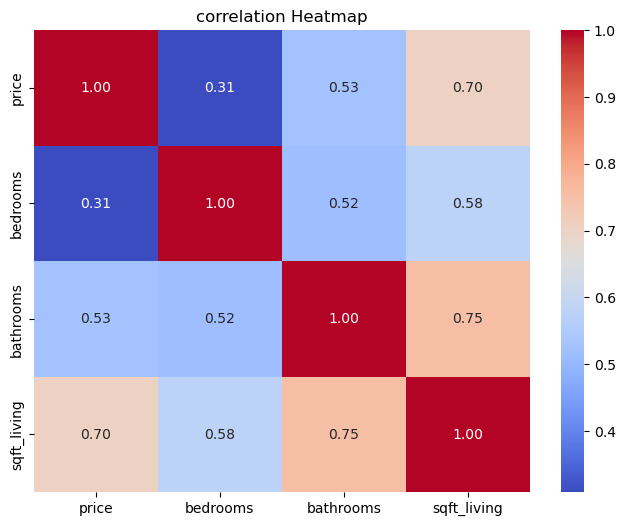

In [12]:
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation Heatmap')
plt.show()

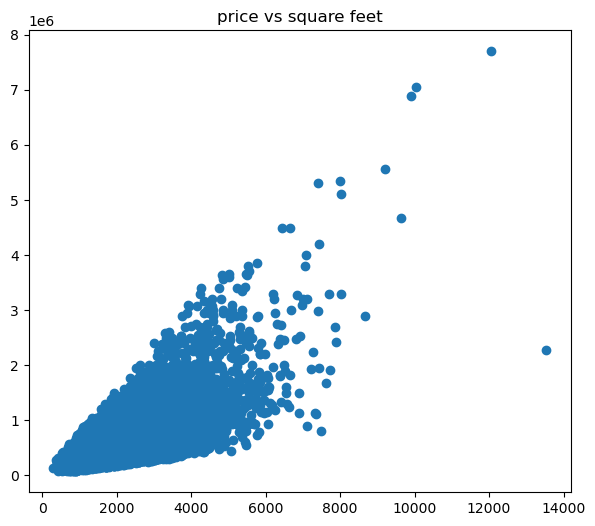

In [13]:
plt.figure(figsize = (7,6))
plt.scatter(x='sqft_living', y='price', data = df1)
plt.title('price vs square feet')
plt.show()

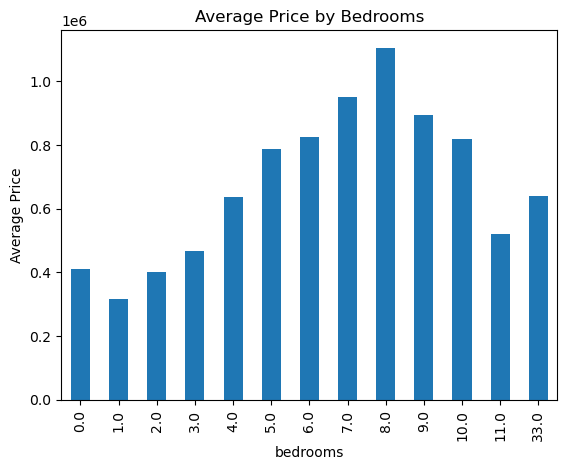

In [14]:
df1.groupby('bedrooms')['price'].mean().plot(kind='bar')
plt.ylabel("Average Price")
plt.title("Average Price by Bedrooms")
plt.show()


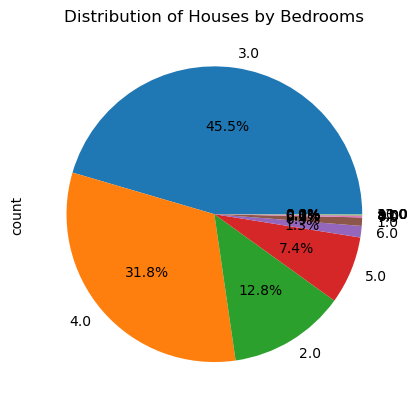

In [15]:
df1['bedrooms'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Houses by Bedrooms")
plt.show()


In [4]:
df.drop(NaN)

NameError: name 'NaN' is not defined

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
x = df.drop(columns = ['price', 'id', 'date','city'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Score (R^2):", model.score(x_test, y_test))

Mean Squared Error: 43098545780.93115
Model Score (R^2): 0.7010053247739192


In [15]:
import pandas as pd

sample_1 = pd.DataFrame([{
    'bedrooms': 3,
    'bathrooms': 1,
    'sqft_living': 1180,
    'sqft_lot': 5650,
    'floors': 1,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1180,
    'sqft_basement': 0,
    'yr_built': 1955,
    'yr_renovated': 0,
    'zipcode': 98178,
    'lat': 47.5112,
    'long': -122.257,
    'sqft_living15': 1340,
    'sqft_lot15': 5650
}])

pred_1 = model.predict(sample_1)
print("Predicted Price:", round(pred_1[0], 2))


Predicted Price: 212309.9
